<a href="https://colab.research.google.com/github/pablogarzon01/DemoReactor/blob/main/RedConvolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
datos , metadatos =tfds.load('fashion_mnist', as_supervised=True , with_info=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteASAI20/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteASAI20/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']


In [4]:
nombres_clases= metadatos.features['label'].names

In [5]:
nombres_clases #Etiquetas de los datos que existen

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
#Normalizar los datos ( pasar de 0-255 a 0-1 convolución)
def normalizar(imagenes, etiquetas):
  imagenes= tf.cast(imagenes, tf.float32)
  imagenes /= 255 #aqui lo pasa de 0-255 a 0-1
  return imagenes, etiquetas

#Normalizar los datos de entrenamiento y prueba  con la funcion que hicimos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)
#Agregar a cache (usar memoria en lugar de disco, entrenamiento mas rapido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()


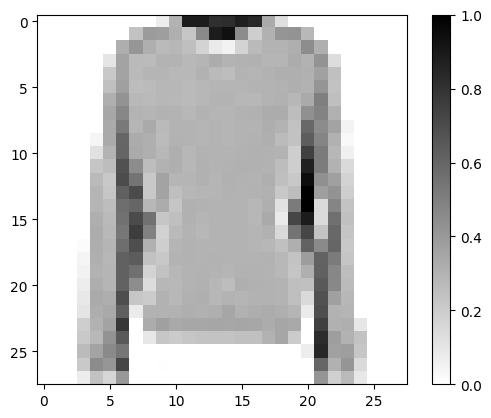

In [8]:
#Mostrar una imagen de los datos de prueba
for imagen , etiqueta in datos_entrenamiento.take(1):
    break
imagen = imagen.numpy().reshape((28,28)) #Redimensionar, cosas de tensor
import matplotlib.pyplot as plt

#Dibujar 
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

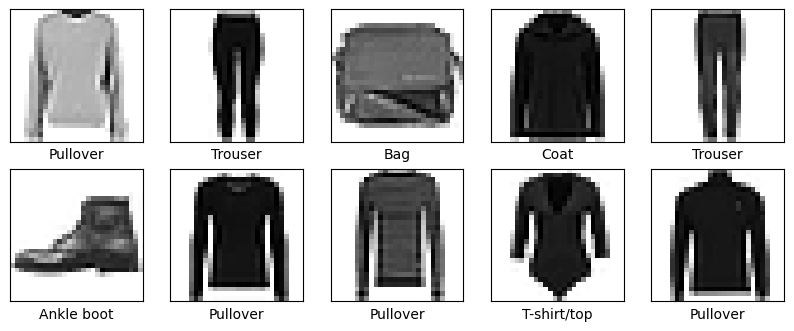

In [14]:
plt.figure(figsize=(10,10))
for i, (imagen,etiqueta) in enumerate(datos_entrenamiento.take(10)):
  imagen=imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [15]:
#Crearemos el modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 - blanco y negro
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.softmax) # para redes de clasificacion
    
])

In [16]:
#Compilador del modelo

modelo.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']

)

In [20]:
num_ej_entrenamiento = metadatos.splits["train"].num_examples 
num_ej_pruebas= metadatos.splits["test"].num_examples

60000


In [21]:
TAMAÑO_LOTES = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMAÑO_LOTES)
datos_pruebas = datos_pruebas.batch(TAMAÑO_LOTES)

In [22]:
import math
#entrenar
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(num_ej_entrenamiento/TAMAÑO_LOTES))

Epoch 1/5
1875/1875 [==============================] - 11s 2ms/step - loss: 0.5588 - accuracy: 0.8062
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3931 - accuracy: 0.8581
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3525 - accuracy: 0.8709
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3314 - accuracy: 0.8780
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3145 - accuracy: 0.8837


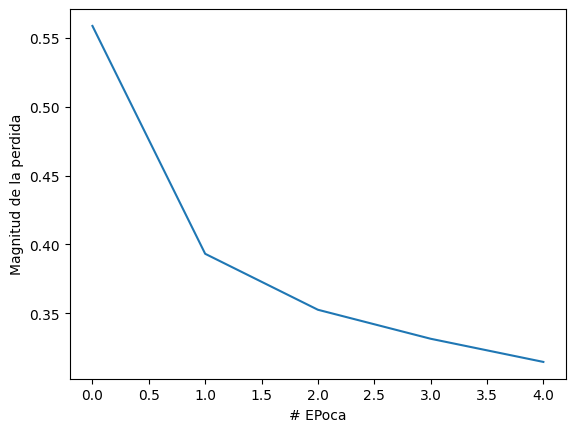

In [24]:
plt.xlabel("# EPoca")
plt.ylabel("Magnitud de la perdida")
plt.plot(historial.history["loss"])

In [25]:
import numpy as np

1/1 [==============================] - 0s 165ms/step


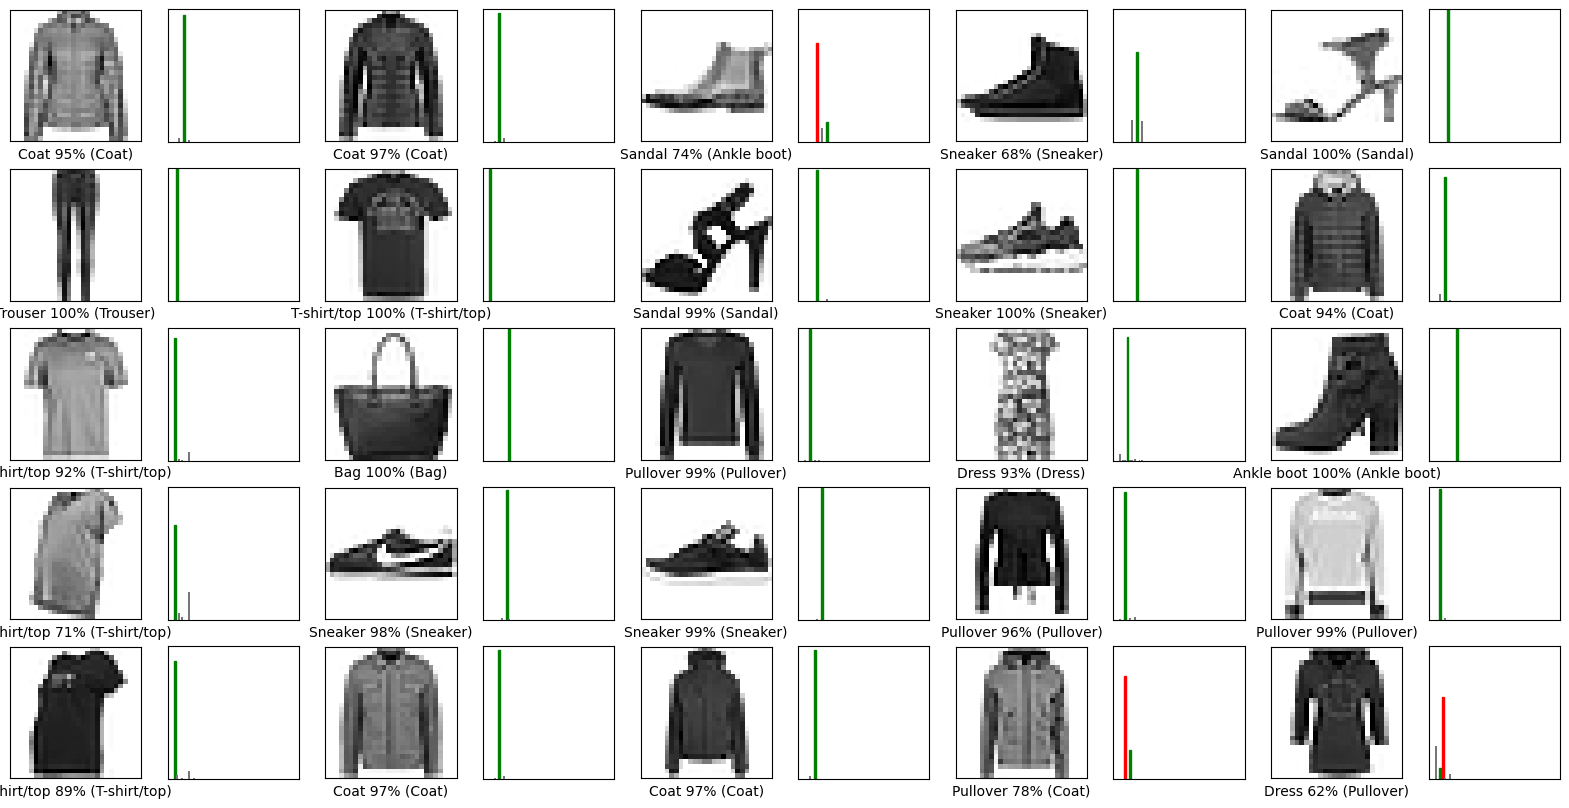

In [37]:
import math
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)
  def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
    arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[...,0], cmap=plt.cm.binary)
    etiqueta_prediccion = np.argmax(arr_predicciones)
    if etiqueta_prediccion == etiqueta_real:
      color = "blue" #Si me lee el horoscopo
    else:
      color = "red" #Le falta odio a la red
    plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion], 100*np.max(arr_predicciones),
        nombres_clases[etiqueta_real],
        color=color
        ))
    
def graficar_valor_arreglo(i,arr_predicciones,etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(50), arr_predicciones, color="#777777")
  plt.ylim([0,1])
  etiqueta_prediccion = np.argmax(arr_predicciones)
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('green')
filas=5
columnas=5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i,predicciones, etiquetas_prueba)


In [39]:
#tomar cualquier indice del set de pruebas para ver su prediccion
imagen = imagenes_prueba[7]
imagen = np.array([imagen])
prediccion = modelo.predict(imagen)
print("prediccion; "+ nombres_clases[np.argmax(prediccion[0])])

1/1 [==============================] - 0s 134ms/step
prediccion; Sandal
